# Objective of Client
    -Identify best sectors,coutries and investment type for making investment 

# Constrains
    - 5 to 15 mn USD per round
    - Invest only in english speaking contries

# Strategies
    -Invest where other investors are investing
    

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline

pd.options.display.float_format = '${:,.2f}'.format


In [4]:
#Get the data first
rounds2 = pd.read_csv('rounds2.csv',encoding = 'ISO-8859-1')
print("rounds2:",rounds2.shape)

companies = pd.read_table('companies.txt',encoding = 'ISO-8859-1')
print("companies:",companies.shape)
  
mappings = pd.read_csv('mapping.csv')
print("mappings:",mappings.shape) 

rounds2: (114949, 6)
companies: (66368, 10)
mappings: (688, 10)


# General data analysis

In [83]:
rounds2.columns,companies.columns,mappings.columns

(Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
        'funding_round_code', 'funded_at', 'raised_amount_usd'],
       dtype='object'),
 Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
        'country_code', 'state_code', 'region', 'city', 'founded_at'],
       dtype='object'),
 Index(['category_list', 'Automotive & Sports', 'Blanks',
        'Cleantech / Semiconductors', 'Entertainment', 'Health',
        'Manufacturing', 'News, Search and Messaging', 'Others',
        'Social, Finance, Analytics, Advertising'],
       dtype='object'))

In [84]:
print(companies.isnull().sum())
companies.describe(include=['O'])

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Ownerlistens,Peach,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [5]:
rounds2.describe(include=['O'])

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at
count,114949,114949,114949,31140,114949
unique,90247,114949,14,8,5033
top,/ORGANIZATION/SOLARFLARE,/funding-round/8a1a40c730c01d1174e4ee5e9b4a9870,venture,A,01-01-2014
freq,10,1,55494,14747,779


    -We can see that permalink has no any null value and all the
      values are unique, so we can take it as a primary key
     Also
    -we have so many null values in our dataset
    -however as per requirement we need raised amount
    -we will remove null categorylist afterwords
    -we are going to remove all the non english countries
        

In [5]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


    -What we can see from the data that permalink and company_parmalink is relation between two dataframe
    -but as from data we see that links are not comparable becoz of uper and lower case ,
    -first convert all to lower case
        

In [128]:
companies['permalink']=companies['permalink'].str.lower()
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()

In [72]:
print("Countries which are not present in companies are as below:")
test=companies.permalink
rounds2.query("company_permalink not in @test")

Countries which are not present in companies are as below:


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,$nan
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,$nan
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,$nan
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,"$1,625,585.00"
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,$nan
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,$nan
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,$nan


    -There are 7 rows in rounds2 dataframe which has company permalink 
      which is not in companies dataframe (this couldbe due to different language character)
    -Merge the two dataframes -rounds2 and companies

In [129]:
master_frame= rounds2.merge(companies, left_on='company_permalink', right_on='permalink', how='inner') 

In [89]:
master_frame.shape,master_frame.columns

((114942, 16),
 Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
        'funding_round_code', 'funded_at', 'raised_amount_usd', 'permalink',
        'name', 'homepage_url', 'category_list', 'status', 'country_code',
        'state_code', 'region', 'city', 'founded_at'],
       dtype='object'))

    -Now we will remove all non emglish speaking contries
    -From the data provided -        'IND','USA','CAN','GBR','AUS','SGP','IRL','NZL','CHE','NGA','ZAF','MUS','KEN','PHL','GHA','UGA','PAK','ZWE','BRB','TTO','CMR','MLT','ZMB','JAM','KNA','RWA','DMA','BLZ','GRD','SYC'
    These are the coutries which speaks english

In [130]:
eng_countries=['IND','USA','CAN','GBR','AUS','SGP','IRL','NZL','CHE','NGA','ZAF','MUS','KEN','PHL','GHA','UGA','PAK','ZWE','BRB','TTO','CMR','MLT','ZMB','JAM','KNA','RWA','DMA','BLZ','GRD','SYC']
master_frame=master_frame[master_frame['country_code'].isin(eng_countries)]
master_frame.shape

(87002, 16)

    -As per requirement we need to consider only countries so we will remove all other columns regarding location

In [131]:
master_frame.drop(['state_code', 'region', 'city'],axis=1,inplace=True)

    -We also do not need funding_round_permalink,funding_round_code,funded_at,name,homepage_url

In [132]:
master_frame.drop(['funding_round_permalink','funding_round_code', 'funded_at','name','homepage_url'\
                    ],axis=1,inplace=True)

In [94]:
master_frame.isnull().sum()

company_permalink         0
funding_round_type        0
raised_amount_usd     13028
permalink                 0
category_list          1286
status                    0
country_code              0
founded_at            12878
dtype: int64

In [133]:
#As mentioned earlier we will impute raised aamount with the help of country and round type
table = master_frame.pivot_table(values='raised_amount_usd', index='country_code' ,columns='funding_round_type', aggfunc=np.mean)
def fillInvest(x):
    return table.loc[x['country_code'],x['funding_round_type']]
# Replace missing values
master_frame['raised_amount_usd'].fillna(master_frame[master_frame['raised_amount_usd'].isnull()].apply(fillInvest,axis=1),inplace=True)

In [106]:
print("Note that the data is after we perform lower case")
print("----------------------------------------------------------")
print("In Rounds2",rounds2.apply(lambda x: len(x.unique())))
print("----------------------------------------------------------")
print("In comapnies",companies.apply(lambda x: len(x.unique())))

Note that the data is after we perform lower case
----------------------------------------------------------
In Rounds2 company_permalink           66370
funding_round_permalink    114949
funding_round_type             14
funding_round_code              9
funded_at                    5033
raised_amount_usd           22096
dtype: int64
----------------------------------------------------------
In comapnies permalink        66368
name             66103
homepage_url     61192
category_list    27297
status               4
country_code       138
state_code         312
region            1093
city              5112
founded_at        3979
dtype: int64


# Funding round type analysis (Checkpoint 2)


In [134]:
#As per the requirement client wants type from only 4 -seed angel venture private equity
#we remove all except them
rounds=['angel','seed','venture','private_equity']
master_frame= master_frame[master_frame['funding_round_type'].isin(rounds)]
master_frame.shape

(70356, 8)

<Container object of 4 artists>

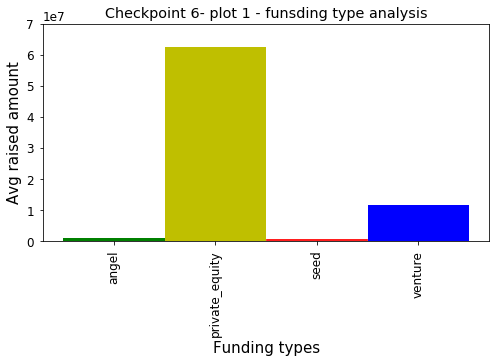

In [135]:

rounds=['angel','seed','venture','private_equity']
graph1=pd.DataFrame(master_frame[master_frame['funding_round_type'].isin(rounds)].groupby('funding_round_type').raised_amount_usd.mean().sort_values(ascending=True))

plt.figure(figsize=(8,4))
plt.title("Checkpoint 6- plot 1 - funsding type analysis") 
plt.xticks(rotation=90)
plt.xlabel("Funding types")
plt.ylabel("Avg raised amount")
plt.ylim(30,70000000) 

plt.bar(graph1.index, graph1.raised_amount_usd, edgecolor='white', width=1,color="RGBY")


In [13]:
funding=pd.DataFrame(master_frame.groupby('funding_round_type').raised_amount_usd.sum().sort_values(ascending=True))
funding=funding.reset_index() 
funding

,funding_round_type,raised_amount_usd
0,angel,"$3,342,112,780.15"
1,seed,"$16,765,718,505.03"
2,private_equity,"$108,295,010,557.57"
3,venture,"$511,119,858,693.18"


Text(0,0.5,'Sum of raised amount')

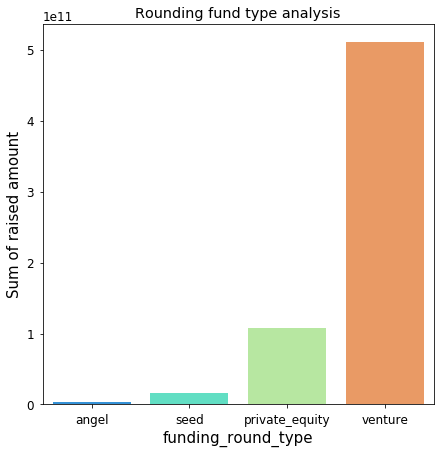

In [171]:
  
plt.figure(figsize=(7,7))   
sns.set_context("paper", font_scale=1.5, rc={"font.size":1,"axes.labelsize":15})
ax=sns.barplot(data=funding,x=funding.funding_round_type,y=funding.raised_amount_usd,palette='rainbow')
plt.title('Rounding fund type analysis')
plt.ylabel("Sum of raised amount")

In [137]:
d=pd.DataFrame(master_frame.groupby(['funding_round_type']).raised_amount_usd.mean())
# d=pd.DataFrame(d.raised_amount_usd.apply(lambda x: '%.2f'%x))
d

,raised_amount_usd
funding_round_type,
angel,"$850,410.38"
private_equity,"$62,489,908.00"
seed,"$820,441.33"
venture,"$11,549,426.25"


    --As per our criteria the amount invested must fall into 5 to 15 mn,
      so 'venture' is the one that we will consider for investment   

In [138]:

master_frame=master_frame[master_frame['funding_round_type']=='venture']
master_frame.shape

(44257, 8)

# Country analysis (Checkpoint 3)

<Container object of 22 artists>

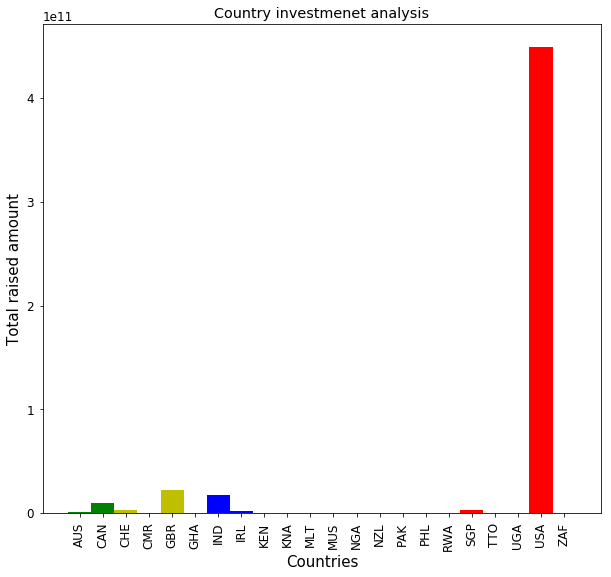

In [139]:
countryInvestments=pd.DataFrame(master_frame.groupby('country_code').raised_amount_usd.sum().sort_values(ascending =True))
 
plt.figure(figsize=(10,9))
plt.title("Country investmenet analysis") 
plt.xticks(rotation=90)
plt.xlabel("Countries")
plt.ylabel("Total raised amount")
plt.bar(countryInvestments.index, countryInvestments.raised_amount_usd, edgecolor='white', width=1,color="RGBY")

    --What we can see from the visuals that most part of investment is done by USA following it is GBR and IND
    --There is a huge difference of amount in USA and all othe coutries
    --We will consider top 10 countries with highest investment for our investigation.

In [140]:
top9=master_frame[master_frame['country_code'].isin(countryInvestments.tail(9).index)]
top9.shape
top9.isnull().sum()

company_permalink        0
funding_round_type       0
raised_amount_usd        2
permalink                0
category_list          417
status                   0
country_code             0
founded_at            7431
dtype: int64

<Container object of 9 artists>

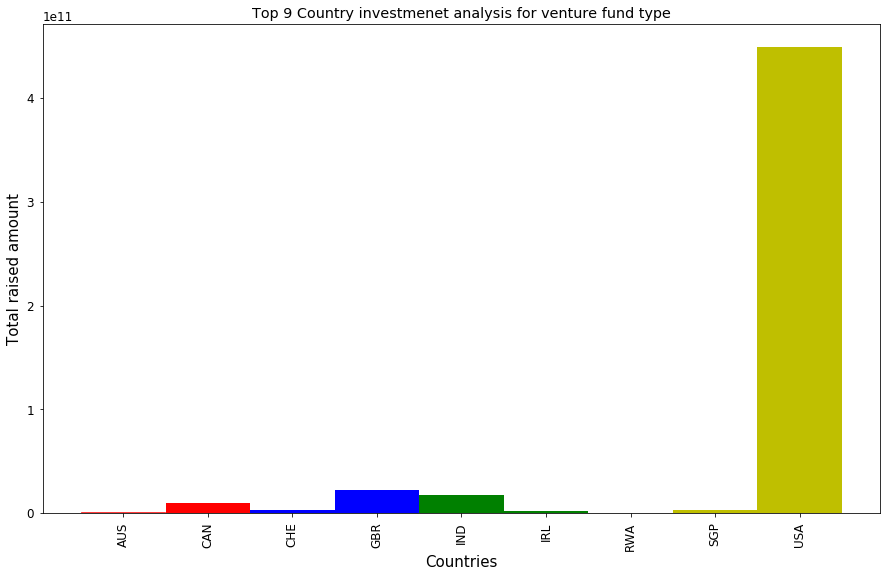

In [141]:
top9Plot=pd.DataFrame(top9.groupby('country_code').raised_amount_usd.sum().sort_values(ascending=True))

plt.figure(figsize=(15,9))
plt.title("Top 9 Country investmenet analysis for venture fund type") 
plt.xticks(rotation=90)
plt.xlabel("Countries")
plt.ylabel("Total raised amount")
plt.bar(top9Plot.index, top9Plot.raised_amount_usd, edgecolor='white', width=1,color="RGBY")

    -here top 3 englidh dpeaking coutries are USA, GBR and IND
    -We will reduce dataset to this 3 top countries
    

In [142]:
top9Plot=top9Plot.sort_values(ascending=False,by='raised_amount_usd')
top9Plot

,raised_amount_usd
country_code,
USA,"$448,617,450,946.87"
GBR,"$22,688,895,347.47"
IND,"$17,326,121,175.07"
CAN,"$10,270,036,065.83"
SGP,"$3,640,942,726.37"
CHE,"$3,492,868,561.41"
IRL,"$2,061,188,552.03"
AUS,"$1,438,531,205.59"
RWA,$nan


In [143]:

master_frame=master_frame[master_frame['country_code'].isin(top9Plot.head(3).index)]
master_frame.shape

(41667, 8)

    -We reduced data from 41k data after removing all other countries except top 3    

In [146]:
countryOrder=pd.DataFrame(master_frame.groupby('country_code').raised_amount_usd.sum().sort_values(ascending=False))
# countryOrder=pd.DataFrame(countryOrder.raised_amount_usd.apply(lambda x: '%.2f'%x))
countryOrder

,raised_amount_usd
country_code,
USA,"$448,617,450,946.87"
GBR,"$22,688,895,347.47"
IND,"$17,326,121,175.07"


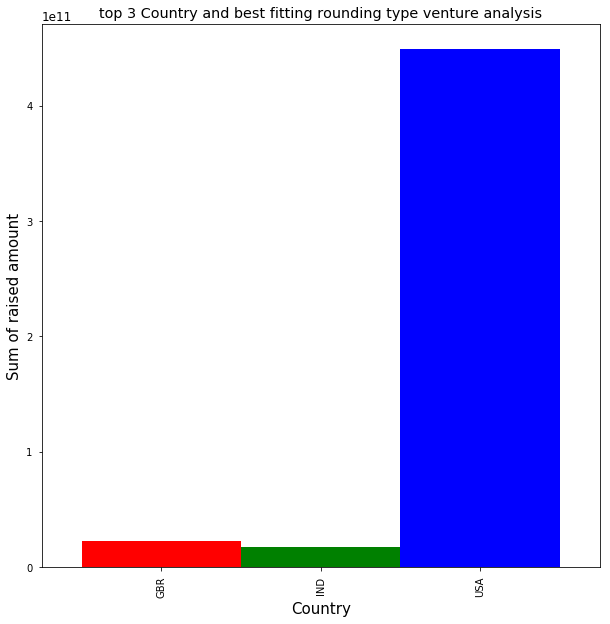

In [147]:
 
plotCountryFund = master_frame.groupby('country_code').raised_amount_usd.sum()
plotCountryFund.plot(figsize=(10,10),kind='bar',fontsize=10,width=1,color='RGB')
plt.ylabel('Sum of raised amount')
plt.xlabel('Country')
plt.title('top 3 Country and best fitting rounding type venture analysis')  
plt.show()

# Sector analysis (Checkpoint 4)
    --we do not have direct mappimg for sectors
    --we do have one hot encoded file for the same, so we will do reverse one hot enconding of given file
    --We have some null data in categories, it is not useful to keep null data, we will remove it

In [148]:

master_frame = master_frame.drop(master_frame[master_frame['category_list'].isnull()].index)

In [149]:
def get_sector(row):
     for c in mappings.columns:
            if row[c]==1:
                return c

mappings['sector']=mappings.apply(get_sector, axis=1)
modified_mappings=mappings[['category_list','sector']]

 

In [150]:
def partPrimary(x):
    #print(x)
    p=[]
    parts = x.split('|')
    for y in parts:
        p.extend(modified_mappings.loc[modified_mappings['category_list']==y]['sector'])
        break
    k=','.join(str(s) for s in set(p))   
    return k
def partMain(x):
    #print(x)
    p=[]
    parts = x.split('|')
    for y in parts:
        p.extend(modified_mappings.loc[modified_mappings['category_list']==y]['sector'])       
    k=','.join(str(s) for s in set(p))   
    return k

master_frame['primary_sector']=master_frame['category_list'].apply(partPrimary)


In [151]:
master_frame['main_sector']=master_frame['category_list'].apply(partMain)

In [178]:
master_frame.head()
#Merged primary sector with our master frame


,company_permalink,funding_round_type,raised_amount_usd,permalink,category_list,status,country_code,founded_at,primary_sector,main_sector
0,/organization/-fame,venture,1.000000e+07,/organization/-fame,Media,operating,IND,NaN,Entertainment,Entertainment
1,/organization/-qounter,venture,1.169127e+07,/organization/-qounter,Application Platforms|Real Time|Social Network...,operating,USA,04-09-2014,"News, Search and Messaging","News, Search and Messaging,Social, Finance, An..."
5,/organization/004-technologies,venture,1.169127e+07,/organization/004-technologies,Software,operating,USA,01-01-2010,Others,Others
10,/organization/0xdata,venture,2.000000e+07,/organization/0xdata,Analytics,operating,USA,01-01-2011,"Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising"
11,/organization/0xdata,venture,1.700000e+06,/organization/0xdata,Analytics,operating,USA,01-01-2011,"Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising"


In [155]:
#Create 3 Dataframes D1,D2,D3 for each top 3 english speaking countries 
D1_USA=pd.DataFrame(master_frame[master_frame['country_code']=='USA'])
D2_GBR=pd.DataFrame(master_frame[master_frame['country_code']=='GBR'])
D3_IND=pd.DataFrame(master_frame[master_frame['country_code']=='IND'])

In [164]:
D1_USA.shape[1]

10

In [168]:
print("Rows of D1_USA", D1_USA.shape[0],"Columns of D1_USA",D1_USA.shape[1],"Total amount raised by USA=",D1_USA.raised_amount_usd.sum())
print("Rows of D2_GBR", D2_GBR.shape[0],"Columns of D2_GBR",D2_GBR.shape[1],"Total amount raised by GBR=",D2_GBR.raised_amount_usd.sum())
print("Rows of D3_IND", D3_IND.shape[0],"Columns of D3_IND",D3_IND.shape[1],"Total amount raised by IND=",D3_IND.raised_amount_usd.sum())

Rows of D1_USA 38034 Columns of D1_USA 10 Total amount raised by USA= 444514477010.36646
Rows of D2_GBR 2265 Columns of D2_GBR 10 Total amount raised by GBR= 22279635651.778175
Rows of D3_IND 984 Columns of D3_IND 10 Total amount raised by IND= 17143373631.191803


In [169]:
USA=pd.DataFrame(D1_USA.groupby(['primary_sector']).raised_amount_usd.agg(['sum', 'count'])).sort_values(by='count',ascending=False)
# pd.DataFrame(USA['sum'].apply(lambda x: '%.2f'%x))
print("---------------------------------------------------------------------------------")
print("USA analysis ")
print("---------------------------------------------------------------------------------")
print(USA)
GBR=pd.DataFrame(D2_GBR.groupby(['primary_sector']).raised_amount_usd.agg(['sum', 'count'])).sort_values(by='count',ascending=False)
print("---------------------------------------------------------------------------------")
print("GBR analysis")
print("---------------------------------------------------------------------------------")
print(GBR)
IND=pd.DataFrame(D3_IND.groupby(['primary_sector']).raised_amount_usd.agg(['sum', 'count'])).sort_values(by='count',ascending=False)
print("---------------------------------------------------------------------------------")
print("IND analysis")
print("---------------------------------------------------------------------------------")
print(IND)

---------------------------------------------------------------------------------
USA analysis 
---------------------------------------------------------------------------------
                                                        sum  count
primary_sector                                                    
Others                                   $87,345,649,996.58   8693
Cleantech / Semiconductors              $121,850,937,524.93   8113
Social, Finance, Analytics, Advertising  $81,894,023,772.70   6916
News, Search and Messaging               $47,670,741,023.92   4562
Health                                   $33,297,711,906.49   3403
Manufacturing                            $27,066,660,960.67   2643
Entertainment                            $18,111,078,910.46   1888
                                         $14,932,340,687.38   1250
Automotive & Sports                      $12,345,332,227.21    566
---------------------------------------------------------------------------------
GBR

In [59]:
USSectors=USA.head(3).index.tolist()
GBRSectors=GBR.head(3).index.tolist()
INDSectors=IND.head(3).index.tolist()
sectors=USSectors+GBRSectors+INDSectors
sectors=list(set(sectors))

In [242]:
D1_USA[D1_USA['primary_sector']=='Others'].groupby('company_permalink').raised_amount_usd.sum().sort_values(ascending=False).head(2)

company_permalink
/organization/social-finance   $1,365,199,900.00
/organization/snapchat         $1,165,100,000.00
Name: raised_amount_usd, dtype: float64

In [243]:
D2_GBR[D2_GBR['primary_sector']=='Others'].groupby('company_permalink').raised_amount_usd.sum().sort_values(ascending=False).head(2)

company_permalink
/organization/oneweb     $500,000,000.00
/organization/farfetch   $194,500,000.00
Name: raised_amount_usd, dtype: float64

In [244]:
D3_IND[D3_IND['primary_sector']=='Others'].groupby('company_permalink').raised_amount_usd.sum().sort_values(ascending=False).head(2)

company_permalink
/organization/flipkart   $2,451,000,000.00
/organization/snapdeal     $345,631,693.92
Name: raised_amount_usd, dtype: float64

Text(0,0.5,'Count of investment')

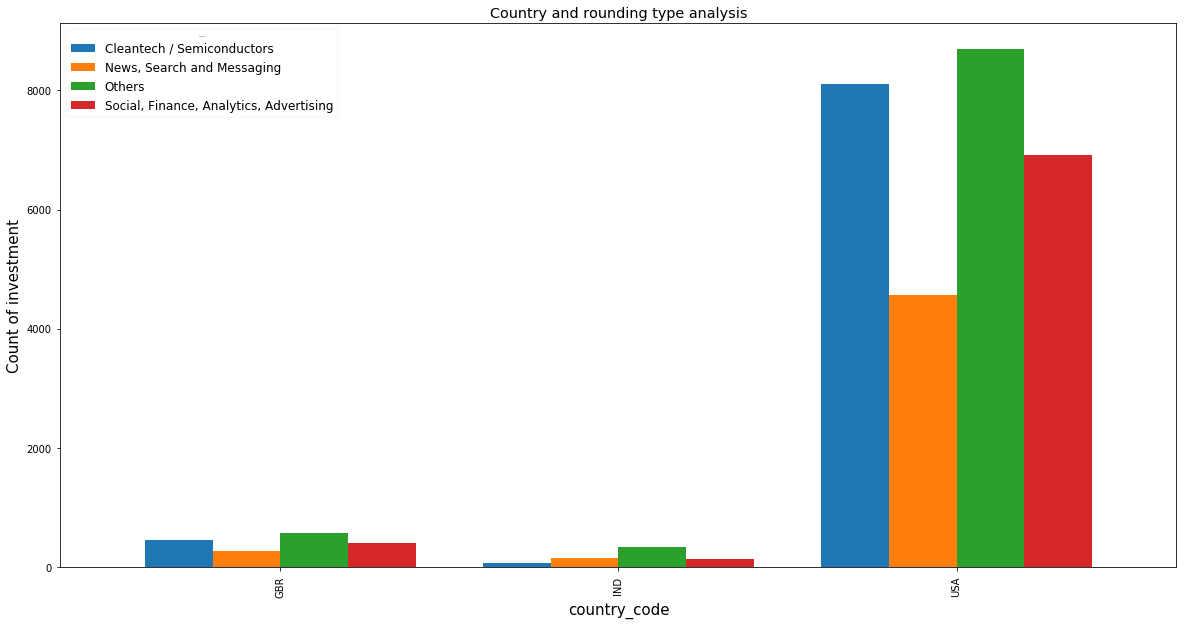

In [65]:
#Top 3 sectors top 3 countries analysis
graph3 = master_frame[master_frame['primary_sector'].isin(sectors)].pivot_table(values='raised_amount_usd', index='country_code' ,columns=['primary_sector'], aggfunc=np.count_nonzero)

graph3.plot(figsize=(20,10),kind='bar',fontsize=10,width=0.8)
plt.title('Country and rounding type analysis') 
plt.ylabel('Count of investment')

    --Notable Observations
        1)USA - Sectors Others,Cleantech/Semiconductors,Social/Finance/Analytics/Advertising 
                are the most occured investment 
        2)GBR - Sectors Others,Cleantech/Semiconductors,Social/Analytics/Advertising 
                are the most occured investmenets
        3)IND - Sectors Others and News seems to top the chart for India 